# **🚀👨‍🚀🔴 Martian Brand Audit Pipeline**

***— For Intergalactic Reputational Assessment***

This pipeline was developed by the Intergalactic Branding Board (IBB), on behalf of the Martian Alliance for Population Growth (MAPG), to evaluate the Earthly public perception of Elon Musk through the lens of Martian values.

The Subject, Elon Musk, has served as MAPG’s brand ambassador in its long-term effort to recruit Earthlings for interplanetary settlement since the early 2000s.

However, the Subject’s personal brand has grown increasingly polarized. Before the global-scale launch of the highly expensive Inhabit Mars campaign, it must be understood how Earthlings truly perceive him, and whether he remains the right ambassadorial candidate.

IBB was commissioned to develop a dashboard prototype to assess the Subject’s credibility as a Martian brand ambassador.  The prototype is designed to produce the following outputs:

* **1. Earthlings’ Emotional Response to the Subject**

* **2. Topic Landscape Around the Subject**

* **3. Martian Suitability Assessment**

By combining sentiment analysis and topic modeling on a large corpus of real tweets, IBB aims to determine whether the Subject is still a viable figurehead for MAPG’s mission - or whether an ambassadorial realignment is needed.

The project blends machine learning with human interpretation to form a narrative-aware, emotionally intelligent assessment of reputational risk (across planetary boundaries).

* 📦 Full dataset the project is based on: [500,000 Elon Musk Tweets on Kaggle](https://www.kaggle.com/datasets/clementdelteil/500-000-tweets-on-elon-musk-nov-dec-2022) (JSON file)


# 1. Sentiment Analysis Pipeline (VADER)

In [131]:
# 📦 SETUP FOR VADER
import pandas as pd
import re
import json
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [132]:
# === 1.1 Load the full JSON dataset ===

import json

# Update path to your JSON file
file_path = "/content/drive/MyDrive/2025, Apr-Jul: AI BOOT CAMP/Projects/Project #3 [Module 3]/elonmusk_tweets_raw.json"

# Load the JSON content
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df_vader = pd.DataFrame(data)

# Inspect available columns to find the tweet text field
df_vader.columns

Index(['id', 'text'], dtype='object')

In [133]:
# === 1.2 Preview raw tweet data ===

df[['id', 'text']].head(10)

,id,text
0,1596647314030231552,@DonutOperator @elonmusk @stillgray It's fiery...
1,1596647313887346689,@SenMarkey @elonmusk Anti-freedom is anti-Amer...
2,1596647313719853056,@FoxNews Elon Musk voices support for Trump ri...
3,1596647313346215941,@elonmusk @CollinRugg Having meetings about me...
4,1596647312746754048,@GregA06555436 @elonmusk @TimRunsHisMouth Yes!...
5,1596647312088076291,@elonmusk @Liz_Wheeler Good luck.
6,1596647311597502464,@Molly85224872 @RealSaavedra @elonmusk @AGHami...
7,1596647309244133377,@RelaxedRelic @atdavidhoffman @cheryela0114 @e...
8,1596647309089153030,@AllenFarer @_Twittmonger @Bucue4 @DogmaticTow...
9,1596647308497600512,@RealJamesWoods @elonmusk I left during the da...


In [134]:
# === 1.3 Clean for VADER ===

def vader_clean(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # remove links
    text = re.sub(r"\s+", " ", text).strip()    # normalize whitespace
    return text

# Apply cleaning
df_vader['text_for_vader'] = df_vader['text'].apply(vader_clean)

# Apply minimal semantic filter for MVP:

# - Keep only tweets with ≥5 words
df_vader = df_vader[df_vader['text_for_vader'].str.split().apply(len) >= 5]

# - Must mention "elon" OR "@elonmusk"
df_vader = df_vader[
    df_vader['text_for_vader'].str.contains("elon", case=False) |
    df_vader['text_for_vader'].str.contains("@elonmusk", case=False)
]

In [135]:
# === 1.4 Preview Cleaned Data (Post-Filtering) ===

# Count before + after cleaning
original_count = len(df)
filtered_count = len(df_vader)
removed_count = original_count - filtered_count

print("📊 Tweet Filtering Summary:")
print(f"• Original tweets: {original_count:,}")
print(f"• Tweets after cleaning: {filtered_count:,}")
print(f"• Tweets removed: {removed_count:,} ({(removed_count / original_count):.2%})")

# Preview first few cleaned examples
df_vader[['text', 'text_for_vader']].head(10)

📊 Tweet Filtering Summary:
• Original tweets: 503,986
• Tweets after cleaning: 462,138
• Tweets removed: 41,848 (8.30%)


,text,text_for_vader
0,@DonutOperator @elonmusk @stillgray It's fiery...,@DonutOperator @elonmusk @stillgray It's fiery...
1,@SenMarkey @elonmusk Anti-freedom is anti-Amer...,@SenMarkey @elonmusk Anti-freedom is anti-Amer...
2,@FoxNews Elon Musk voices support for Trump ri...,@FoxNews Elon Musk voices support for Trump ri...
3,@elonmusk @CollinRugg Having meetings about me...,@elonmusk @CollinRugg Having meetings about me...
4,@GregA06555436 @elonmusk @TimRunsHisMouth Yes!...,@GregA06555436 @elonmusk @TimRunsHisMouth Yes!...
6,@Molly85224872 @RealSaavedra @elonmusk @AGHami...,@Molly85224872 @RealSaavedra @elonmusk @AGHami...
7,@RelaxedRelic @atdavidhoffman @cheryela0114 @e...,@RelaxedRelic @atdavidhoffman @cheryela0114 @e...
8,@AllenFarer @_Twittmonger @Bucue4 @DogmaticTow...,@AllenFarer @_Twittmonger @Bucue4 @DogmaticTow...
9,@RealJamesWoods @elonmusk I left during the da...,@RealJamesWoods @elonmusk I left during the da...
10,@littlemissjacob @elonmusk Have a wonderful we...,@littlemissjacob @elonmusk Have a wonderful we...


In [136]:
# === 1.4 Apply VADER ===
sid = SentimentIntensityAnalyzer()
df_vader['vader_scores'] = df_vader['text_for_vader'].apply(lambda x: sid.polarity_scores(x))
df_vader = pd.concat([df_vader.drop(['vader_scores'], axis=1), df_vader['vader_scores'].apply(pd.Series)], axis=1)

In [137]:
# === 1.5 Create sentiment label based on VADER compound score ===

def get_sentiment(compound_score):
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply the function to the compound column
df_vader['sentiment_label'] = df_vader['compound'].apply(get_sentiment)

📊 Sentiment Distribution (tweet counts + %):

Negative  → 151,764 tweets (32.84%)
Neutral   → 124,861 tweets (27.02%)
Positive  → 185,513 tweets (40.14%)


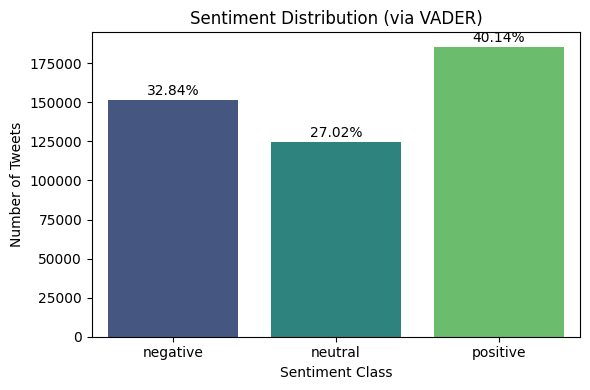


📋 First 10 tweets with VADER sentiment labels:


,text_for_vader,compound,sentiment_label
0,@DonutOperator @elonmusk @stillgray It's fiery...,-0.4003,negative
1,@SenMarkey @elonmusk Anti-freedom is anti-Amer...,0.0000,neutral
2,@FoxNews Elon Musk voices support for Trump ri...,0.4019,positive
3,@elonmusk @CollinRugg Having meetings about me...,0.0000,neutral
4,@GregA06555436 @elonmusk @TimRunsHisMouth Yes!...,0.5080,positive
6,@Molly85224872 @RealSaavedra @elonmusk @AGHami...,-0.5574,negative
7,@RelaxedRelic @atdavidhoffman @cheryela0114 @e...,-0.5255,negative
8,@AllenFarer @_Twittmonger @Bucue4 @DogmaticTow...,-0.1027,negative
9,@RealJamesWoods @elonmusk I left during the da...,0.4588,positive
10,@littlemissjacob @elonmusk Have a wonderful we...,0.5719,positive


In [138]:
# === 1.6 Evaluation: Visualize and inspect sentiment distribution ===

import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Sentiment count and percentage
sentiment_counts = df_vader['sentiment_label'].value_counts().sort_index()
sentiment_percent = round((sentiment_counts / sentiment_counts.sum()) * 100, 2)

# 🔢 Print both count + %
print("📊 Sentiment Distribution (tweet counts + %):\n")
for sentiment in sentiment_counts.index:
    count = sentiment_counts[sentiment]
    percent = sentiment_percent[sentiment]
    print(f"{sentiment.capitalize():<9} → {count:,} tweets ({percent}%)")

# 📈 Bar chart with % labels
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    hue=sentiment_counts.index,
    palette="viridis",
    legend=False
)
plt.title("Sentiment Distribution (via VADER)")
plt.ylabel("Number of Tweets")
plt.xlabel("Sentiment Class")

# 🏷️ Add % labels on top of bars
for i, val in enumerate(sentiment_counts.values):
   plt.text(i, val + 1000, f"{sentiment_percent.iloc[i]}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 🔍 Preview first 10 labeled tweets for manual sanity check
print("\n📋 First 10 tweets with VADER sentiment labels:")
df_vader[['text_for_vader', 'compound', 'sentiment_label']].head(10)


## 2. Topic Modeling Pipeline (LDA)

This pipeline processes the full tweet dataset to extract latent thematic clusters using Latent Dirichlet Allocation (LDA).
We clean the data, tokenize, remove stopwords, lemmatize, vectorize with Bag of Words (BoW), and then train the model.

**Note:**

⚠️ In some environments (especially Google Colab), the default nltk.download("punkt") does not always download the full internal tokenizer configuration – specifically a file called punkt_tab.

If this file is missing, you'll get an error like:
LookupError: Resource punkt_tab not found.

✅ Solution: We explicitly download punkt_tab to ensure word_tokenize() works smoothly during preprocessing.

In [139]:
# 📦 SETUP FOR LDA

# Install + import emoji handling
!pip install emoji
import emoji

# Core libraries
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns

# NLP + Topic Modeling
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 🧠 Download required NLTK resources (and patch bug)
nltk.download("punkt")          # Tokenization
nltk.download("punkt_tab")      # Colab bug-fix (not always bundled)
nltk.download("stopwords")      # Stopword removal
nltk.download("wordnet")        # Lemmatization
nltk.download("omw-1.4")        # Lemma support (e.g. 'run' vs 'running')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [140]:
# === 2.1 Create LDA-specific copy of dataset ===

# Create a copy of the main dataset for LDA
df_lda = df.copy()

**=== 2.2 Clean & Preprocess for Topic Modeling (LDA) ===**

In [141]:
# 2.2.1 Remove emojis (since they distort LDA semantic structure)

# Remove emojis using emoji.replace_emoji

def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

df_lda['text_for_lda'] = df_lda['text'].apply(remove_emojis)

In [142]:
# 2.2.2 Clean text - remove URLs, mentions, normalize whitespace

def clean_text_for_lda(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # Remove @mentions
    text = re.sub(r"@\w+", "", text)

    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

df_lda['text_for_lda'] = df_lda['text_for_lda'].apply(clean_text_for_lda)

In [143]:
# 2.2.3 Apply minimal semantic filter for quality control

# Keep only tweets with 5+ words
df_lda = df_lda[df_lda['text_for_lda'].str.split().apply(len) >= 5]

# Must mention "elon" or "@elonmusk" in original text (to ensure topical relevance)
df_lda = df_lda[
    df_lda['text_for_lda'].str.contains("elon", case=False) |
    df_lda['text_for_lda'].str.contains("@elonmusk", case=False)
    ]

In [144]:
# 2.2.4 NLP Preprocessing Pipeline for LDA

# 🛑 Stopwords (Standard + Twitter-specific + Verbose-ord)
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words('english'))
custom_stopwords = {
    'rt', 'amp', 'https', 'co', 'im', 'us', 'u', 'like', 'just', 'get', 'dont',
    'one', 'know', 'new', 'said', 'say', 'would', 'also', 'people', 'really',
    'elon', 'musk', 'twitter', 'come', 'based', 'even', 'bad', 'number', 'ask', 'asking'
}
stop_words.update(custom_stopwords)

# 🍃 Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
lemmatizer = WordNetLemmatizer()

# 🧠 Tokenizer
from nltk.tokenize import word_tokenize
nltk.download("punkt")

def preprocess_for_lda(text):
    # Tokenize
    tokens = word_tokenize(text)

    # Lowercase and keep only alphabetic or hyphenated words (e.g. anti-American)
    tokens = [word.lower() for word in tokens if re.match(r'^[a-zA-Z]+(-[a-zA-Z]+)?$', word)]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# 🔁 Apply
df_lda['tokens'] = df_lda['text_for_lda'].apply(preprocess_for_lda)

# 🧼 Drop empty
df_lda = df_lda[df_lda['tokens'].apply(len) > 0].reset_index(drop=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [145]:
# 2.2.5 Preview Cleaned Data (Post-Filtering) – LDA

# Count before and after cleaning for LDA
original_count = len(df)
filtered_count = len(df_lda)
removed_count = original_count - filtered_count

print("📊 LDA Preprocessing Summary:")
print(f"• Original tweets: {original_count:,}")
print(f"• Tweets after LDA cleaning: {filtered_count:,}")
print(f"• Tweets removed: {removed_count:,} ({(removed_count / original_count):.2%})")

# 👁️ Preview first 10 cleaned + tokenized examples
print("\n📋 First 10 tokenized tweets (for LDA input):")
df_lda[['text_for_lda', 'tokens']].head(10)


📊 LDA Preprocessing Summary:
• Original tweets: 503,986
• Tweets after LDA cleaning: 73,752
• Tweets removed: 430,234 (85.37%)

📋 First 10 tokenized tweets (for LDA input):


,text_for_lda,tokens
0,Elon Musk voices support for Trump rival Ron D...,"[voice, support, trump, rival, ron, desantis, ..."
1,The statistics MTG is citing come from Alignab...,"[statistic, mtg, citing, alignable, social, ne..."
2,"Now, this Marxist dirt hole wants to regulate ...","[marxist, dirt, hole, want, regulate, big, tec..."
3,$MIKOTO #MIKOTO CA RENOUNCED BUY BACK AND BURN...,"[mikoto, mikoto, ca, renounced, buy, back, bur..."
4,"#ELONMUSK, can you hear #IranianWomen? Why doe...","[elonmusk, hear, iranianwomen, allow, devil, k..."
5,Liberals bashing be like “Twitter is failing c...,"[liberal, bashing, failing, cuz, allowing, con..."
6,After Elon Musk's Twitter another Social Netwo...,"[another, social, network, starting, two, blue..."
7,Elon Musk is ready to try his troubled new ver...,"[ready, try, troubled, verification, system, t..."
8,How is Elon Musk african american?,"[african, american]"
9,Fomenting 8nsurection is against the law. Rega...,"[fomenting, law, regardless, person, two, poli..."


In [146]:
# === 2.3 Vectorization with Bag-of-Words ===

from sklearn.feature_extraction.text import CountVectorizer

# Rejoin tokens into strings
df_lda['lda_ready_text'] = df_lda['tokens'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer with additional filters
vectorizer = CountVectorizer(
    max_features=5000,     # limit vocabulary size for speed
    min_df=10,             # remove rare words (<10 docs)
    max_df=0.95,           # remove overly common words (>95% docs)
    stop_words='english'   # extra layer of stopword removal
)

# Fit and transform BoW
X_lda = vectorizer.fit_transform(df_lda['lda_ready_text'])

# Inspect shape
print("📐 BoW matrix shape:", X_lda.shape)

📐 BoW matrix shape: (73752, 5000)


In [147]:
# === 2.4 Train LDA Model ===

from sklearn.decomposition import LatentDirichletAllocation

# Set number of topics (adjust if needed)
n_topics = 6

# Initialize LDA model
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=20,
    learning_method='online',
    random_state=42,
    evaluate_every=5,           # prints log-likelihood every 5 iterations
    verbose=1                   # show progress
)

# Fit model to BoW matrix
lda_model.fit(X_lda)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20, perplexity: 871.0804
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20, perplexity: 857.0621
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20, perplexity: 853.5425
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20, perplexity: 851.9998


LatentDirichletAllocation(evaluate_every=5, learning_method='online',
                          max_iter=20, n_components=6, random_state=42,
                          verbose=1)

In [148]:
# === 2.5 Assign Topic Distributions to Tweets ===

# Step 1: 🔄 Get topic probabilities for each tweet
lda_topic_dist = lda_model.transform(X_lda)  # shape = [n_tweets, n_topics]

# Step 2: 🏷 Assign dominant topic (highest prob) to each tweet
df_lda['dominant_topic'] = lda_topic_dist.argmax(axis=1)

# Step 3: 📊 Optional – inspect topic distribution counts
topic_counts = df_lda['dominant_topic'].value_counts().sort_index()
print("📚 Tweets per topic:\n")
for topic_id, count in topic_counts.items():
    print(f"🧵 Topic {topic_id}: {count:,} tweets")

📚 Tweets per topic:

🧵 Topic 0: 9,183 tweets
🧵 Topic 1: 30,029 tweets
🧵 Topic 2: 2,124 tweets
🧵 Topic 3: 8,240 tweets
🧵 Topic 4: 16,069 tweets
🧵 Topic 5: 8,107 tweets


In [149]:
# === 2.6 Manual Topic Interpretation & Labeling ===

# Step 1: View Top Words per Topic (manual interpretation)
def print_top_words(model, feature_names, n_top_words=10):
    print("📚 Top keywords per topic:\n")
    for topic_idx, topic in enumerate(model.components_):
        top_features = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_features]
        print(f"🧵 Topic {topic_idx}: {', '.join(top_words)}")

# Run the function
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda_model, tf_feature_names)

# Step 2: 🔖 (Manual) Assign human-readable topic labels
# Replace these labels with your own after interpreting top words
topic_labels = {
    0: "Right-wing political praise",
    1: "Critique of leadership style",
    2: "Meme culture & mockery",
    3: "Tech innovation & Tesla",
    4: "Crypto & market speculation",
    5: "Fanboy admiration / worship"
}

# Step 3: Map topic numbers to labels
df_lda['topic_label'] = df_lda['dominant_topic'].map(topic_labels)

📚 Top keywords per topic:

🧵 Topic 0: elonmusk, nft, bsc, huge, rabbit, airdrop, cmc, cg, buy, bot
🧵 Topic 1: speech, free, right, trump, want, think, thing, good, going, make
🧵 Topic 2: elonmusk, christmas, live, roadmap, fastrack, mkt, filling, best, project, telegram
🧵 Topic 3: tesla, world, poll, company, real, man, biden, file, spacex, let
🧵 Topic 4: need, account, ceo, time, tweet, help, day, news, truth, look
🧵 Topic 5: trumplon, team, lp, elonmusk, token, presale, private, low, trump, starting


In [150]:
# === 2.6 Manual Topic Interpretation & Labeling ===

# Step 1: View Top Words per Topic (manual interpretation)
def print_top_words(model, feature_names, n_top_words=10):
    print("📚 Top keywords per topic:\n")
    for topic_idx, topic in enumerate(model.components_):
        top_features = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_features]
        print(f"🧵 Topic {topic_idx}: {', '.join(top_words)}")

# Run the function
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda_model, tf_feature_names)

📚 Top keywords per topic:

🧵 Topic 0: elonmusk, nft, bsc, huge, rabbit, airdrop, cmc, cg, buy, bot
🧵 Topic 1: speech, free, right, trump, want, think, thing, good, going, make
🧵 Topic 2: elonmusk, christmas, live, roadmap, fastrack, mkt, filling, best, project, telegram
🧵 Topic 3: tesla, world, poll, company, real, man, biden, file, spacex, let
🧵 Topic 4: need, account, ceo, time, tweet, help, day, news, truth, look
🧵 Topic 5: trumplon, team, lp, elonmusk, token, presale, private, low, trump, starting


In [151]:
# Step 2: Assign human-readable topic labels (generated together with ChatGPT) ===
# Based on the top keywords from each topic, the following human-readable labels have been assigned.

# Topic 0: elonmusk, nft, bsc, huge, rabbit, airdrop, cmc, cg, buy, bot
# → Interpretation: Classic crypto shill vocabulary, including terms like “airdrops”, “buy”, “bot”, “cmc” (CoinMarketCap), and meme-trigger words like “huge” and “rabbit”.
# Suggested label: "Crypto Shilling & Meme Coins"

# Topic 1: speech, free, right, trump, want, think, thing, good, going, make
# → Interpretation: Tweets focused on freedom of speech and right-wing ideology. Includes references to Trump and subjective/persuasive language.
# Suggested label: "Free Speech & Right-Wing Ideology"

# Topic 2: elonmusk, christmas, live, roadmap, fastrack, mkt, filling, best, project, telegram
# → Interpretation: Promotional buzz around community launches or crypto/NFT campaigns. Words like “roadmap”, “telegram”, “project”, and “best” indicate hype mechanics.
# Suggested label: "Launch Hype & Community Promotions"

# Topic 3: tesla, world, poll, company, real, man, biden, file, spacex, let
# → Interpretation: Tweets about Tesla, SpaceX, leadership, and politics. The mixture of tech terms and political figures (e.g. Biden) suggests a blend of public perception and global relevance.
# Suggested label: "Tesla, Politics & Public Persona"

# Topic 4: need, account, ceo, time, tweet, help, day, news, truth, look
# → Interpretation: Daily reactions, complaints, and emotional commentary about Elon’s behavior. Words like “need”, “help”, “truth”, and “CEO” suggest personal responses and criticism.
# Suggested label: "Daily Commentary & CEO Criticism"

# Topic 5: trumplon, team, lp, elonmusk, token, presale, private, low, trump, starting
# → Interpretation: Political crypto projects and MAGA-themed tokens. Terms like “presale”, “private”, and “low” are typical of pump-style launches, and the mix with “Trump”/“Trumplon” confirms the tone.
# Suggested label: "Pro-Trump Token Promotions"

# → Labels curated by AI assistant based on narrative frequency analysis
topic_labels = {
    0: "Crypto Shilling & Meme Coins",
    1: "Free Speech & Right-Wing Ideology",
    2: "Launch Hype & Community Promotions",
    3: "Tesla, Politics & Public Persona",
    4: "Daily Commentary & CEO Criticism",
    5: "Pro-Trump Token Promotions"
}

# Apply the labels
df_lda['topic_label'] = df_lda['dominant_topic'].map(topic_labels)


📊 Topic Distribution:

Free Speech & Right-Wing Ideology: 30,029 tweets (40.72%)
Daily Commentary & CEO Criticism: 16,069 tweets (21.79%)
Crypto Shilling & Meme Coins: 9,183 tweets (12.45%)
Tesla, Politics & Public Persona: 8,240 tweets (11.17%)
Pro-Trump Token Promotions: 8,107 tweets (10.99%)
Launch Hype & Community Promotions: 2,124 tweets (2.88%)


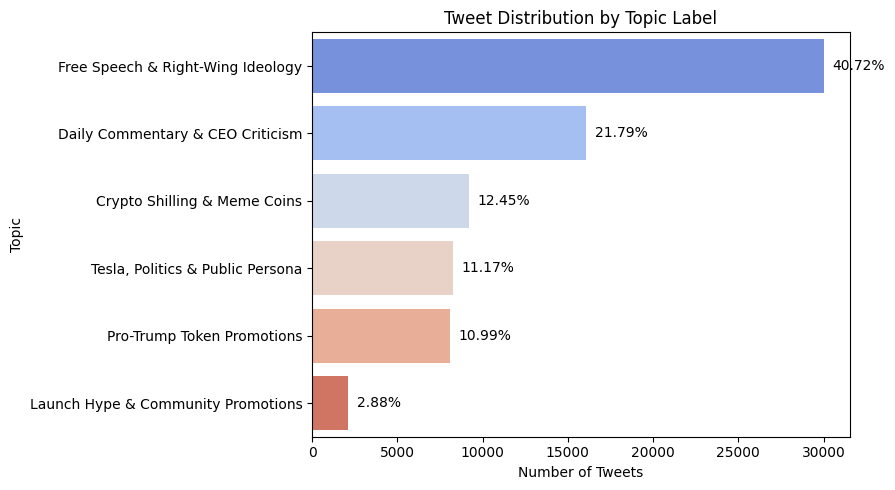

In [152]:
# === 2.7 Topic Distribution Visualization (with %) ===

import matplotlib.pyplot as plt
import seaborn as sns

# Group by label instead of topic number
topic_counts = df_lda['topic_label'].value_counts().sort_values(ascending=False)
topic_percent = round((topic_counts / topic_counts.sum()) * 100, 2)

# 🔢 Print summary
print("📊 Topic Distribution:\n")
for label in topic_counts.index:
    print(f"{label}: {topic_counts[label]:,} tweets ({topic_percent[label]}%)")

# 📈 Prepare DataFrame for plotting with hue
plot_df = topic_counts.reset_index()
plot_df.columns = ['Topic Label', 'Tweet Count']
plot_df['Percent'] = plot_df['Tweet Count'] / plot_df['Tweet Count'].sum() * 100
plot_df['Percent'] = plot_df['Percent'].round(2)

# Plot
plt.figure(figsize=(9, 5))
ax = sns.barplot(
    data=plot_df,
    y='Topic Label',
    x='Tweet Count',
    hue='Topic Label',
    dodge=False,
    palette="coolwarm",
    legend=False
)
plt.title("Tweet Distribution by Topic Label")
plt.xlabel("Number of Tweets")
plt.ylabel("Topic")

# 🏷️ Add % labels on bars
for i, row in plot_df.iterrows():
    ax.text(
        row['Tweet Count'] + 500,  # offset x for label
        i,                         # y-position
        f"{row['Percent']}%",
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

**=== 2.8 Manual Evaluation: Topic Resonance Score ===**


***🪐 Topic Resonance Score (Manual Evaluation)***

This section introduces a high-level metric called the **Topic Resonance Score**, developed by the Intergalactic Branding Board (IBB) to assess how well Elon Musk's Earthly discourse aligns with Martian values and future vision.

---

***💡 What is it?***

The score calculates the proportion of tweets associated with topics that are considered "Martian-aligned" — i.e. tweets that reflect:

- Innovation, vision, and intelligence
- Leadership, technological progress, or cosmic ambition
- Philosophical or ideological resonance with the Martian mission

This is a **manually calibrated filter**, based on qualitative interpretation of the LDA topics.

---

***🧠 How was the decision made?***

Each topic generated via LDA was reviewed based on its top keywords. The following interpretations were made:

- **Topic 0: "Crypto Shilling & Meme Coins"** → Disqualified (noisy, pump/hype language)
- **Topic 1: "Free Speech & Right-Wing Ideology"** → *Martian-aligned* (expresses ideological clarity and social architecture, despite polarity)
- **Topic 2: "Launch Hype & Community Promotions"** → Borderline (marketing-oriented, potentially performative)
- **Topic 3: "Tesla, Politics & Public Persona"** → Possibly aligned (focus on technological leadership, but mixed with ego discourse)
- **Topic 4: "Daily Commentary & CEO Criticism"** → *Martian-aligned* (shadow feedback, useful for field recalibration)
- **Topic 5: "Pro-Trump Token Promotions"** → Disqualified (Matrix exploitation layer, not frequency-consistent)

Based on this review, **topics 1 and 4** were selected as **Martian-aligned**.

---

***📈 How is the score calculated?***

1. Select which topic indices are considered aligned (e.g. `[1, 4]`)
2. Count how many tweets fall into these topics
3. Divide by the total number of tweets
4. Output a final **Topic Resonance Score**, ranging from 0 to 1

This score will later be combined with sentiment data to form a comprehensive **Martian Suitability Score™** — a reputational metric used to evaluate ambassadorial readiness across planetary boundaries.

In [153]:
# === 2.8 Topic Resonance Score ===

# Manually define aligned topics based on human interpretation
martian_aligned_topics = [1, 4]

aligned_tweets = df_lda[df_lda['dominant_topic'].isin(martian_aligned_topics)]
topic_resonance_score = round(len(aligned_tweets) / len(df_lda), 4)

print("\n🪐 Martian Topic Resonance Score:")
print(f"→ Aligned tweets: {len(aligned_tweets):,} / {len(df_lda):,} tweets")
print(f"→ Score: {topic_resonance_score * 100:.2f}%")



🪐 Martian Topic Resonance Score:
→ Aligned tweets: 46,098 / 73,752 tweets
→ Score: 62.50%


# 3. Martian Suitability Score

This final section combines emotional tone (sentiment analysis) and thematic resonance (topic modeling) into a unified metric called the **Martian Suitability Score™**.

### 📈 Components:
- **Sentiment Integrity Score:** % of tweets expressing trust or admiration toward the Subject.
- **Topic Resonance Score:** % of tweets related to Martian-aligned themes (as defined via LDA topic review).
- **Final Score:** A weighted average (60% sentiment, 40% thematic) indicating reputational alignment.

### 🪐 Classification:
- ✅ **Suitable Ambassador** (score ≥ 0.75)
- 🧐 **Needs Further Analysis** (0.50 – 0.74)
- ❌ **High Risk Candidate** (score < 0.50)

This framework supports interplanetary branding decisions ahead of the Mars colonization initiative.

In [154]:
# === 3.1 Sentiment Integrity Score (VADER-based) ===

# Define positive label according to VADER
positive_label = 'positive'

# Calculate proportion of tweets with VADER-labeled positive sentiment
sentiment_integrity = (df_vader['sentiment_label'] == positive_label).mean()

print(f"🧠 Sentiment Integrity Score (VADER): {sentiment_integrity:.4f}")

🧠 Sentiment Integrity Score (VADER): 0.4014


### **Martian Classification of the VADER classifications:**

* **'positive'** = pro-Martian resonance (e.g. admiration, excitement, support)

* **'neutral'** = low signal / excluded

* **'negative'** = critique, sarcasm, fear – not aligned

**Sentiment Integrity =** % of tweets labeled as 'positive' in the cleaned VADER dataset

In [155]:
# === 3.2 Topic Resonance Score ===

# Based on previous manual evaluation of topics (Step 2.8)
# Already calculated earlier in variable: topic_resonance_score
topic_resonance = topic_resonance_score  # alias for clarity

print(f"🌌 Topic Resonance Score:     {topic_resonance:.4f}")

🌌 Topic Resonance Score:     0.6250


In [156]:
# === 3.3 Final Martian Suitability Score ===

# Weighted combination: adjust if needed
sentiment_weight = 0.6
topic_weight = 0.4

suitability_score = round(
    (sentiment_integrity * sentiment_weight) +
    (topic_resonance * topic_weight),
    4
)

print(f"🚀 Final Suitability Score:   {suitability_score:.4f}")

🚀 Final Suitability Score:   0.4909


In [157]:
# === 3.4 Classification: Final Verdict ===

if suitability_score >= 0.75:
    verdict = "✅ Suitable Ambassador"
elif suitability_score >= 0.5:
    verdict = "🧐 Needs Further Analysis"
else:
    verdict = "❌ High Risk Candidate"

# 📊 Full summary printout
print("\n🌍 MARTIAN SUITABILITY SCORE SUMMARY")
print("------------------------------------")
print(f"🧠 Sentiment Integrity Score: {sentiment_integrity:.4f}")
print(f"🌌 Topic Resonance Score:     {topic_resonance:.4f}")
print(f"🚀 Final Suitability Score:   {suitability_score:.4f}")
print(f"🪐 Verdict:                   {verdict}")


🌍 MARTIAN SUITABILITY SCORE SUMMARY
------------------------------------
🧠 Sentiment Integrity Score: 0.4014
🌌 Topic Resonance Score:     0.6250
🚀 Final Suitability Score:   0.4909
🪐 Verdict:                   ❌ High Risk Candidate


# 4. Gradio Dashboard Prototype

In [160]:
# === GRADIO DEMO: VADER Sentiment Prediction ===

import gradio as gr
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# 🧠 Download VADER lexicon (if not already present)
nltk.download('vader_lexicon')

# 🚀 Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# 🧪 Sentiment classification function with error handling
def classify_sentiment(text):
    try:
        if not text.strip():
            return "Please enter a tweet!"
        score = sid.polarity_scores(text)['compound']
        if score >= 0.05:
            label = "positive"
        elif score <= -0.05:
            label = "negative"
        else:
            label = "neutral"
        return f"🧠 Sentiment: {label}\n📈 Compound Score: {score:.3f}"
    except Exception as e:
        return f"❌ Error: {str(e)}"

# 🎛️ Gradio Interface
demo = gr.Interface(
    fn=classify_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter a tweet about Elon Musk..."),
    outputs=gr.Textbox(label="Prediction"),
    title="🧠 IBB Sentiment Scanner",
    description="Classify the emotional tone of any Elon-related tweet using VADER sentiment analysis.\n\nPositive? Neutral? Negative? Let the Intergalactic Branding Board decide."
)

# 🚀 Launch the app in Colab (add 'debug=True' if debug should be enabled)
demo.launch()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://782052074e557c3233.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
